# Compare memorisation scores of CIFAR100 subset with scores for full dataset

## CIFAR100 memscores: eval first 10 classes new

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Subset

memorisation_scores_subset10 = np.load('memorsation_scores_subset_0_10.npy')
memorisation_scores_subset20 = np.load('memorsation_scores_subset_0_20.npy')
memorisation_scores_subset50 = np.load('memorsation_scores_subset_0_50.npy')
memorisation_scores_whole = np.load('memorsation_scores_cifar100_whole.npy')

print('original sizes:')
print(len(memorisation_scores_subset10))
print(len(memorisation_scores_subset20))
print(len(memorisation_scores_subset50))
print(len(memorisation_scores_whole))

trainset = torchvision.datasets.CIFAR100(root='/tmp', train=True, download=True, transform=None)
memorisation_scores_whole = [score for score, (_, label) in zip(memorisation_scores_whole, trainset) if 0 <= label < 10]

trainset = torchvision.datasets.CIFAR100(root='/tmp', train=True, download=True, transform=None)
labels = np.array(trainset.targets)
mask = np.logical_and(labels >= 0, labels < 20)
indicies = np.argwhere(mask).flatten()
trainset = Subset(trainset, indicies)
memorisation_scores_subset20 = [score for score, (_, label) in zip(memorisation_scores_subset20, trainset) if 0 <= label < 10]

trainset = torchvision.datasets.CIFAR100(root='/tmp', train=True, download=True, transform=None)
labels = np.array(trainset.targets)
mask = np.logical_and(labels >= 0, labels < 50)
indicies = np.argwhere(mask).flatten()
trainset = Subset(trainset, indicies)
memorisation_scores_subset50 = [score for score, (_, label) in zip(memorisation_scores_subset50, trainset) if 0 <= label < 10]

print('shapes after class filtering:')
print(memorisation_scores_subset10.shape)
print(len(memorisation_scores_subset20))
print(len(memorisation_scores_subset50))
print(len(memorisation_scores_whole))

original sizes:
5000
10000
25000
50000


100%|██████████| 169001437/169001437 [06:11<00:00, 455500.03it/s] 


Extracting /tmp/cifar-100-python.tar.gz to /tmp
Files already downloaded and verified
Files already downloaded and verified
shapes after class filtering:
(5000,)
5000
5000
5000


[0.16749531, 0.3471753, 0.38855916, 0.4094077]
[0.2708, 0.5506, 0.5442, 0.5702]


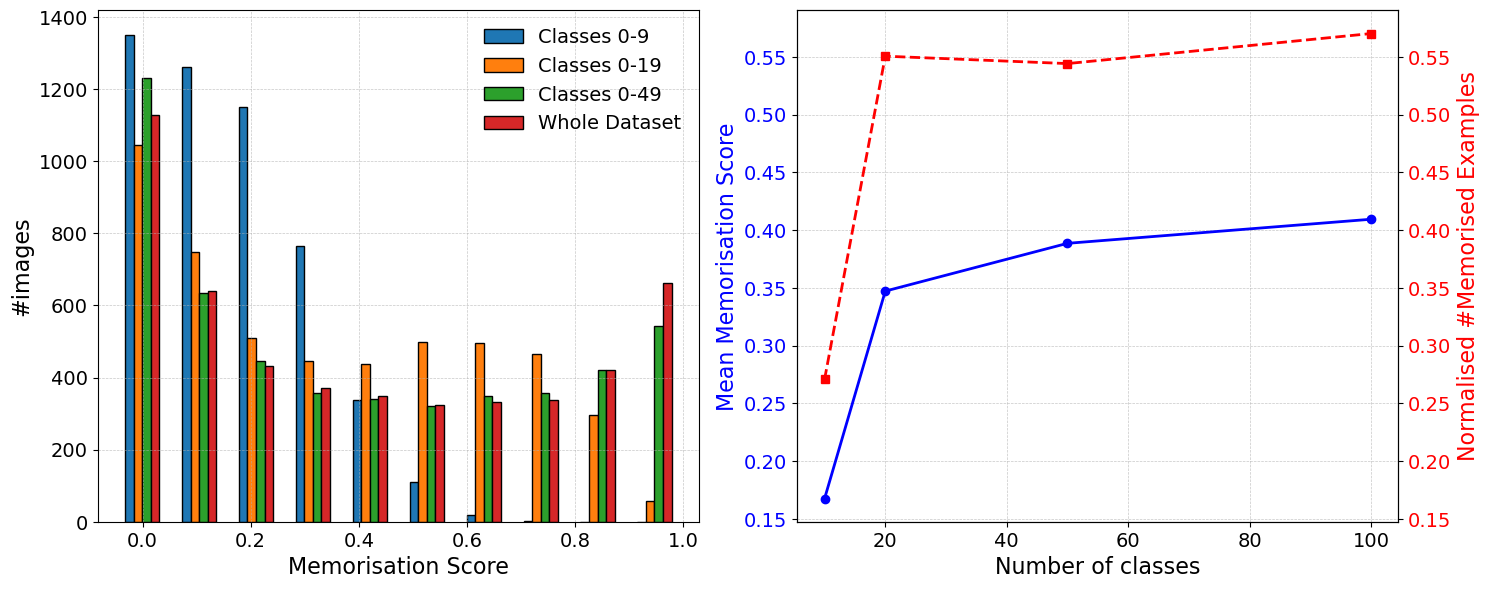

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-deep')


mem_scores = [memorisation_scores_subset10, memorisation_scores_subset20, memorisation_scores_subset50, memorisation_scores_whole]
color_range = plt.cm.tab10.colors
colors = color_range[:4]
bar_width = 0.7
fig, ax1 = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.set_figheight(6)

bins = np.linspace(0.05, 0.95, 10)  # center positions for 10 bins
width = 0.025  # width of each bar

ax1[0].hist(mem_scores,
            color=colors,
            label=['Classes 0-9', 'Classes 0-19', 'Classes 0-49', 'Whole Dataset'],
            align='mid',
            rwidth=0.6,
            edgecolor='black'
            )
ax1[0].legend(loc='upper right', frameon=False, fontsize=14)
all_data = np.concatenate([memorisation_scores_subset20, memorisation_scores_subset50, memorisation_scores_whole])
ax1[0].set_xlabel('Memorisation Score', fontsize=16)
ax1[0].set_ylabel('#images', fontsize=16)
ax1[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax1[0].tick_params(axis='x', labelsize=14)
ax1[0].tick_params(axis='y', labelsize=14)


mem_scores = [memorisation_scores_subset10, memorisation_scores_subset20, memorisation_scores_subset50, memorisation_scores_whole]

subset_sizes = [10, 20, 50, 100]
memscore_means = [np.mean(m) for m in mem_scores]
print(memscore_means)
num_above_25 = [np.sum(np.array(m) > 0.25) / len(m) for m in mem_scores]
print(num_above_25)
num_above_50 = [np.sum(np.array(m) > 0.5) / len(m) for m in mem_scores]

# Align the y-limits across both axes
ymin = min(min(memscore_means), min(num_above_25)) - 0.02
ymax = max(max(memscore_means), max(num_above_25)) + 0.02
ax1[1].set_ylim(ymin, ymax)


ax1[1].plot(subset_sizes, memscore_means, marker='o', linestyle='-', color='b', label='Mean Memorisation Scores', linewidth=2)
ax1[1].set_xlabel('Number of classes', fontsize=16)
# ax1[1].set_xticks([10, 20, 50, 100])
ax1[1].tick_params(axis='x', labelsize=14)
ax1[1].set_ylabel('Mean Memorisation Score', fontsize=16, color='b')
ax1[1].tick_params(axis='y', labelcolor='b', labelsize=14)
ax2 = ax1[1].twinx()
ax1[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax2.plot(subset_sizes, num_above_25, marker='s', linestyle='--', color='r', label='Normalised #Memorised Examples', linewidth=2)
# ax2.plot(subset_sizes, num_above_50, marker='s', linestyle='--', color='g', label='Normalised #Memorised Examples')
ax2.set_ylabel('Normalised #Memorised Examples', fontsize=16, color='r')
ax2.tick_params(axis='y', labelcolor='r', labelsize=14)
ax2.set_ylim(ymin, ymax)

fig.tight_layout()

plt.show()

## CIFAR100 memscores: eval first 20 classes

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Subset

memorisation_scores_subset20 = np.load('memorsation_scores_subset_0_20.npy')
memorisation_scores_subset50 = np.load('memorsation_scores_subset_0_50.npy')
memorisation_scores_whole = np.load('datasets/memorsation_scores_cifar100.npy')

print('original sizes:')
print(len(memorisation_scores_subset20))
print(len(memorisation_scores_subset50))
print(len(memorisation_scores_whole))

max_label = 20
trainset = torchvision.datasets.CIFAR100(root='/tmp', train=True, download=True, transform=None)
memorisation_scores_whole = [score for score, (_, label) in zip(memorisation_scores_whole, trainset) if 0 <= label < max_label]

trainset = torchvision.datasets.CIFAR100(root='/tmp', train=True, download=True, transform=None)
labels = np.array(trainset.targets)
mask = np.logical_and(labels >= 0, labels < 20)
indicies = np.argwhere(mask).flatten()
trainset = Subset(trainset, indicies)
memorisation_scores_subset20 = [score for score, (_, label) in zip(memorisation_scores_subset20, trainset) if 0 <= label < max_label]

trainset = torchvision.datasets.CIFAR100(root='/tmp', train=True, download=True, transform=None)
labels = np.array(trainset.targets)
mask = np.logical_and(labels >= 0, labels < 50)
indicies = np.argwhere(mask).flatten()
trainset = Subset(trainset, indicies)
memorisation_scores_subset50 = [score for score, (_, label) in zip(memorisation_scores_subset50, trainset) if 0 <= label < max_label]

print('shapes after class filtering:')
print(len(memorisation_scores_subset20))
print(len(memorisation_scores_subset50))
print(len(memorisation_scores_whole))

original sizes:
10000
25000
50000
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
shapes after class filtering:
10000
10000
10000


[0.36502433, 0.41197568, 0.43341392]
[0.5785, 0.5743, 0.5936]


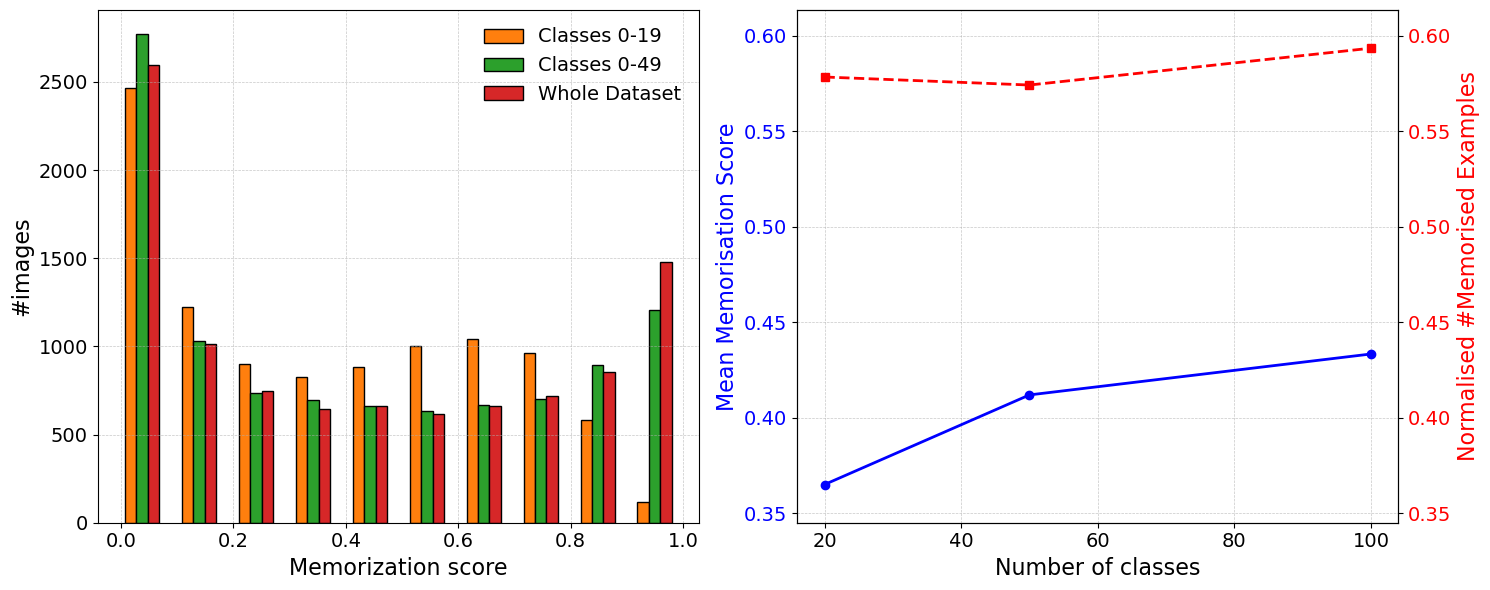

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-deep')


mem_scores = [memorisation_scores_subset20, memorisation_scores_subset50, memorisation_scores_whole]
color_range = plt.cm.tab10.colors
colors = color_range[1:4]
bar_width = 0.7
fig, ax1 = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.set_figheight(6)
ax1[0].hist(mem_scores,
            color=colors,
            label=['Classes 0-19', 'Classes 0-49', 'Whole Dataset'],
            align='mid',
            rwidth=0.6,
            edgecolor='black'
            )
ax1[0].legend(loc='upper right')
all_data = np.concatenate([memorisation_scores_subset20, memorisation_scores_subset50, memorisation_scores_whole])
# ax1[0].set_xlim(np.min(all_data), np.max(all_data))
ax1[0].set_xlabel('Memorisation Score')
ax1[0].set_ylabel('#images')
ax1[0].tick_params(axis='x', labelsize=14)
ax1[0].set_xlabel('Number of classes', fontsize=16)
ax1[0].tick_params(axis='x', labelsize=14)
ax1[0].set_xlabel('Memorization score', fontsize=16)
ax1[0].tick_params(axis='x', labelsize=14)
ax1[0].tick_params(axis='y', labelsize=14)
ax1[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax1[0].legend(loc='upper right', frameon=False, fontsize=14)
ax1[0].set_ylabel('#images', fontsize=16)


subset_sizes = [20, 50, 100]
memscore_means = [np.mean(m) for m in mem_scores]
print(memscore_means)
num_above_25 = [np.sum(np.array(m) > 0.25) / len(m) for m in mem_scores]
print(num_above_25)

# Align the y-limits across both axes
ymin = min(min(memscore_means), min(num_above_25)) - 0.02
ymax = max(max(memscore_means), max(num_above_25)) + 0.02
ax1[1].set_ylim(ymin, ymax)

ax1[1].plot(subset_sizes, memscore_means, marker='o', linestyle='-', color='b', label='Mean Memorisation Scores', linewidth=2)
ax1[1].set_xlabel('Number of classes', fontsize=16)
ax1[1].set_xticks([20, 40, 60, 80, 100])
ax1[1].set_ylabel('Mean Memorisation Score', color='b', fontsize=16)
ax1[1].tick_params(axis='y', labelcolor='b', labelsize=14)
ax1[1].tick_params(axis='x', labelsize=14)

ax2 = ax1[1].twinx()
ax2.plot(subset_sizes, num_above_25, marker='s', linestyle='--', color='r', label='Normalised #Memorised Examples', linewidth=2)
ax2.set_ylabel('Normalised #Memorised Examples', color='red', fontsize=16)
ax2.tick_params(axis='y', labelcolor='r', labelsize=14)

ax1[1].set_ylabel('Mean Memorisation Score', color='b', fontsize=16)
ax1[1].tick_params(axis='x', labelsize=14)
ax1[1].set_xlabel('Number of classes', fontsize=16)
ax1[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

ax2.set_ylabel('Normalised #Memorised Examples', color='red', fontsize=16)
ax2.tick_params(axis='y', labelcolor='r', labelsize=14)
ax2.set_ylim(ymin, ymax)
fig.tight_layout()

plt.show()

## CIFAR100 memscores: eval first 50 classes

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Subset

memorisation_scores_subset50 = np.load('memorsation_scores_subset_0_50.npy')
memorisation_scores_whole = np.load('datasets/memorsation_scores_cifar100.npy')

print('original sizes:')
print(len(memorisation_scores_subset50))
print(len(memorisation_scores_whole))

max_label = 50
trainset = torchvision.datasets.CIFAR100(root='/tmp', train=True, download=True, transform=None)
memorisation_scores_whole = [score for score, (_, label) in zip(memorisation_scores_whole, trainset) if 0 <= label < max_label]

trainset = torchvision.datasets.CIFAR100(root='/tmp', train=True, download=True, transform=None)
labels = np.array(trainset.targets)
mask = np.logical_and(labels >= 0, labels < 50)
indicies = np.argwhere(mask).flatten()
trainset = Subset(trainset, indicies)
memorisation_scores_subset50 = [score for score, (_, label) in zip(memorisation_scores_subset50, trainset) if 0 <= label < max_label]

print('shapes after class filtering:')
print(len(memorisation_scores_subset50))
print(len(memorisation_scores_whole))

original sizes:
25000
50000
Files already downloaded and verified
Files already downloaded and verified
shapes after class filtering:
25000
25000


[0.39184391, 0.4174054]
[0.54612, 0.57272]


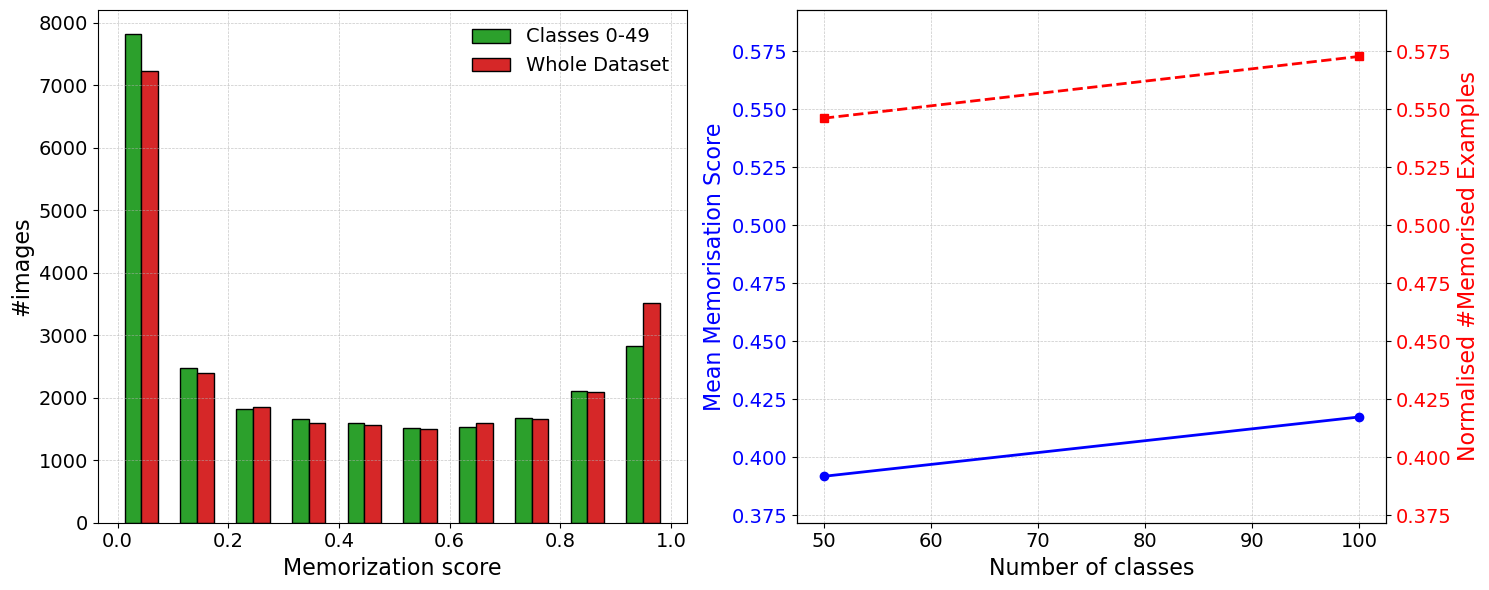

In [13]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-deep')


mem_scores = [memorisation_scores_subset50, memorisation_scores_whole]
color_range = plt.cm.tab10.colors
colors = color_range[2:4]
bar_width = 0.7
fig, ax1 = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.set_figheight(6)
ax1[0].hist(mem_scores,
            color=colors,
            label=['Classes 0-49', 'Whole Dataset'],
            align='mid',
            rwidth=0.6,
            edgecolor='black'
            )
ax1[0].legend(loc='upper right')
all_data = np.concatenate([memorisation_scores_subset50, memorisation_scores_whole])
# ax1[0].set_xlim(np.min(all_data), np.max(all_data))
ax1[0].set_xlabel('Memorisation Scores')

ax1[0].tick_params(axis='x', labelsize=14)
ax1[0].set_xlabel('Memorization score', fontsize=16)
ax1[0].tick_params(axis='x', labelsize=14)
ax1[0].tick_params(axis='y', labelsize=14)
ax1[0].set_ylabel('#images', fontsize=16)


# Align the y-limits across both axes
ymin = min(min(memscore_means), min(num_above_25)) - 0.02
ymax = max(max(memscore_means), max(num_above_25)) + 0.02
ax1[1].set_ylim(ymin, ymax)
ax1[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax1[0].legend(loc='upper right', frameon=False, fontsize=14)

subset_sizes = [50, 100]
memscore_means = [np.mean(m) for m in mem_scores]
print(memscore_means)
num_above_25 = [np.sum(np.array(m) > 0.25) / len(m) for m in mem_scores]
print(num_above_25)

ax1[1].plot(subset_sizes, memscore_means, marker='o', linestyle='-', color='b', label='Mean Memorisation Scores', linewidth=2)
ax1[1].set_xlabel('Number of classes')
ax1[1].set_xticks([10, 20, 50, 100])
ax1[1].set_ylabel('Mean Memorisation Score', color='b')
ax1[1].tick_params(axis='y', labelcolor='b')
ax2 = ax1[1].twinx()
ax2.plot(subset_sizes, num_above_25, marker='s', linestyle='--', color='r', label='Normalised #Memorised Examples', linewidth=2)
ax2.set_ylabel('Normalised #Memorised Examples', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax1[1].set_ylabel('Mean Memorisation Score', color='b', fontsize=16)
ax1[1].tick_params(axis='x', labelsize=14)
ax1[1].set_xlabel('Number of classes', fontsize=16)
ax1[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax1[1].tick_params(axis='y', labelcolor='b', labelsize=14)
ax2.set_ylabel('Normalised #Memorised Examples', color='red', fontsize=16)
ax2.tick_params(axis='y', labelcolor='r', labelsize=14)
ax2.set_ylim(ymin, ymax)
ax1[1].set_xticks([50, 60, 70, 80, 90, 100])

fig.tight_layout()

plt.show()

## CIFAR10 subsets

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Subset
from sklearn.model_selection import StratifiedKFold, train_test_split

memorisation_scores_cifar10_01 = np.load('memorsation_scores_cifar10_01.npy')
memorisation_scores_cifar10_03 = np.load('memorsation_scores_cifar10_03.npy')
memorisation_scores_cifar10_05 = np.load('memorsation_scores_cifar10_05.npy')
memorisation_scores_cifar10_07 = np.load('memorsation_scores_cifar10_07.npy')
memorisation_scores_cifar10_09 = np.load('memorsation_scores_cifar10_09.npy')

print('original sizes:')
print(len(memorisation_scores_cifar10_01))
print(len(memorisation_scores_cifar10_03))
print(len(memorisation_scores_cifar10_05))
print(len(memorisation_scores_cifar10_07))
print(len(memorisation_scores_cifar10_09))

original sizes:
5000
15000
25000
35000
45000


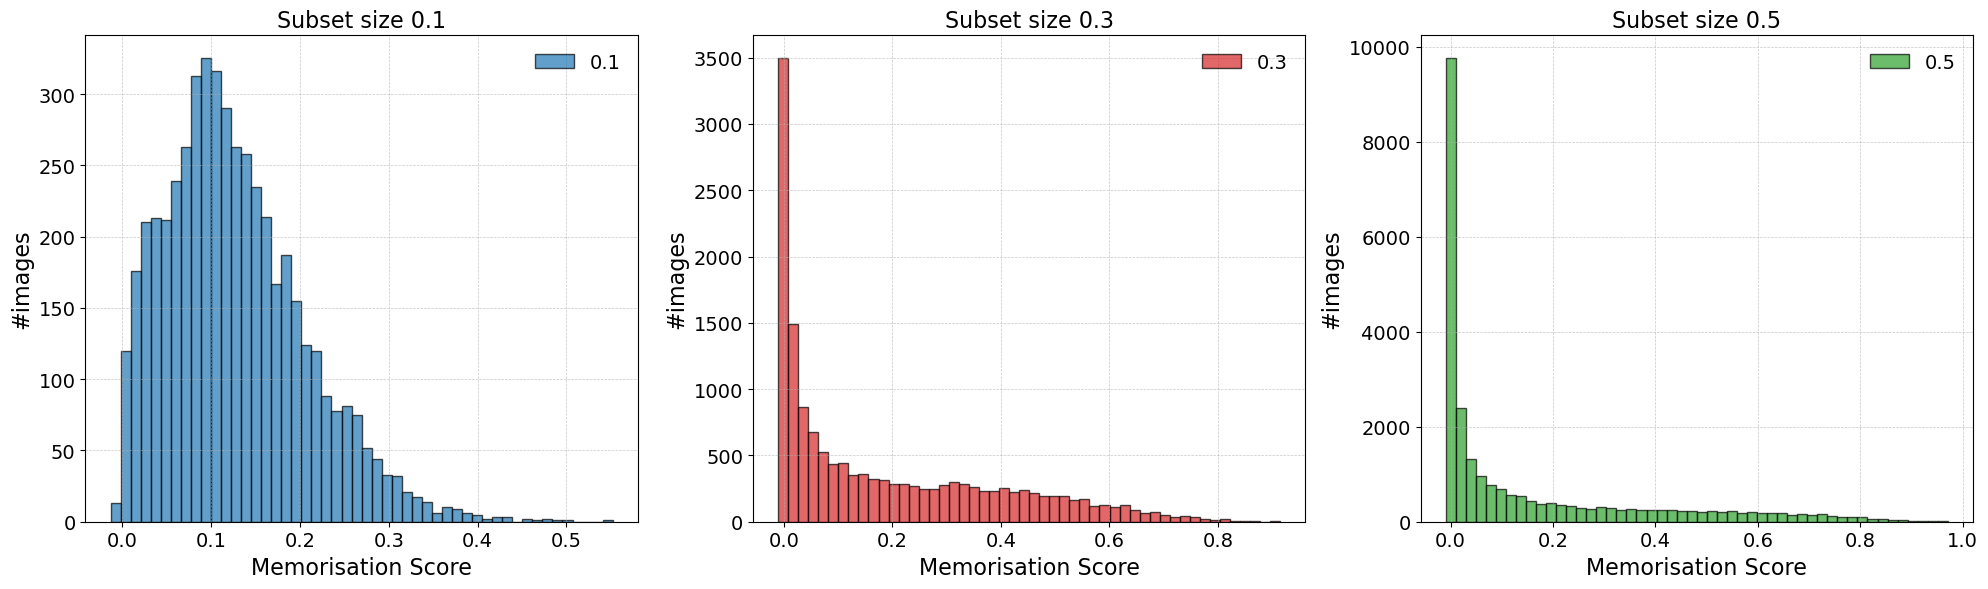

In [16]:
import matplotlib.pyplot as plt

# Create histograms
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(memorisation_scores_cifar10_01, bins=50, color=color_range[0], alpha=0.7, label='0.1', edgecolor='black')

# Add labels and legend
plt.xlabel('Memorisation Score', fontsize=16)
plt.ylabel('#images', fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.title('Subset size 0.1', fontsize=16)
plt.legend(loc='upper right', frameon=False, fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.subplot(1, 3, 2)
plt.hist(memorisation_scores_cifar10_03, bins=50, color=color_range[3], alpha=0.7, label='0.3', edgecolor='black')

# Add labels and legend
plt.xlabel('Memorisation Score', fontsize=16)
plt.ylabel('#images', fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.title('Subset size 0.3', fontsize=16)
plt.legend(loc='upper right', frameon=False, fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.subplot(1, 3, 3)
plt.hist(memorisation_scores_cifar10_05, bins=50, color=color_range[2], alpha=0.7, label='0.5', edgecolor='black')

# Add labels and legend
plt.xlabel('Memorisation Score', fontsize=16)
plt.ylabel('#images', fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.title('Subset size 0.5', fontsize=16)
plt.legend(loc='upper right', frameon=False, fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()

plt.show()

/tmp/ipykernel_30945/3897579018.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


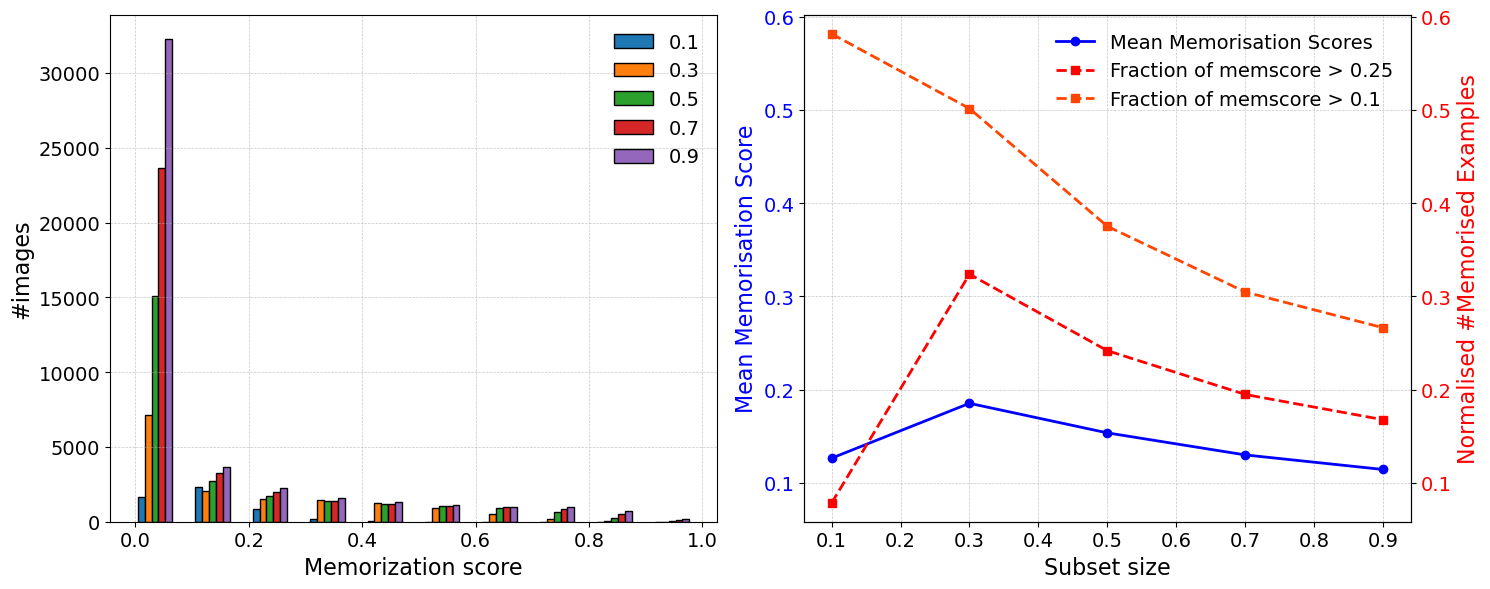

In [ ]:
import matplotlib.pyplot as plt

# print(plt.style.available)
plt.style.use('seaborn-v0_8-deep')

fig, ax1 = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.set_figheight(6)

color_range = plt.cm.tab10.colors
colors = color_range[:5]
bar_width = 0.7

ax1[0].hist([memorisation_scores_cifar10_01, memorisation_scores_cifar10_03, memorisation_scores_cifar10_05, memorisation_scores_cifar10_07, memorisation_scores_cifar10_09],
         color=colors,
         label=['0.1', '0.3', '0.5', '0.7', '0.9'],
         align='mid',
         rwidth=0.6,
            edgecolor='black'
         )
plt.legend(loc='upper right')
ax1[0].set_xlabel('Memorisation Scores')
ax1[0].set_ylabel('#images')
# plt.tight_layout()
ax1[0].legend()

ax1[0].set_xlabel('Memorization score', fontsize=16)
ax1[0].set_ylabel('#images', fontsize=16)
ax1[0].tick_params(axis='x', labelsize=14)
ax1[0].tick_params(axis='y', labelsize=14)
ax1[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax1[0].legend(loc='upper right', frameon=False, fontsize=14)


subset_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
mem_scores = [memorisation_scores_cifar10_01, memorisation_scores_cifar10_03, memorisation_scores_cifar10_05, memorisation_scores_cifar10_07, memorisation_scores_cifar10_09]
memscore_means = [np.mean(m) for m in mem_scores]
# print(memscore_means)
num_above_25 = [np.sum(m > 0.25) / len(m) for m in mem_scores]
# print(num_above_25)
num_above_10 = [np.sum(m > 0.1) / len(m) for m in mem_scores]
# print(num_above_10)

# Align the y-limits across both axes
ymin = min(min(memscore_means), min(num_above_25), min(num_above_10)) - 0.02
ymax = max(max(memscore_means), max(num_above_25), max(num_above_10)) + 0.02
ax1[1].set_ylim(ymin, ymax)

lns1 = ax1[1].plot(subset_sizes, memscore_means, marker='o', linestyle='-', color='b', label='Mean Memorisation Scores', linewidth=2)
ax1[1].set_xlabel('Subset size')
ax1[1].set_ylabel('Mean Memorisation Score', color='b')
ax1[1].tick_params(axis='y', labelcolor='b')
ax1[1].legend(loc=0)
ax2 = ax1[1].twinx()
lns2 = ax2.plot(subset_sizes, num_above_25, marker='s', linestyle='--', color='r', label='Fraction of memscore > 0.25', linewidth=2)
lns3 = ax2.plot(subset_sizes, num_above_10, marker='s', linestyle='--', color='orangered', label='Fraction of memscore > 0.1', linewidth=2)
ax2.set_ylabel('Normalised #Memorised Examples', color='r')
ax2.tick_params(axis='y', labelcolor='r')


lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1[1].legend(lns, labs, loc=0, frameon=False, fontsize=14)

ax1[1].set_xlabel('Subset size', fontsize=16)
ax1[1].set_ylabel('Mean Memorisation Score', color='b', fontsize=16)
ax1[1].tick_params(axis='x', labelsize=14)
ax1[1].tick_params(axis='y', labelcolor='b', labelsize=14)
ax1[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax2.set_ylabel('Normalised #Memorised Examples', color='red', fontsize=16)
ax2.tick_params(axis='y', labelcolor='r', labelsize=14)
ax2.set_ylim(ymin, ymax)

fig.tight_layout()

plt.show()

## ResNet50

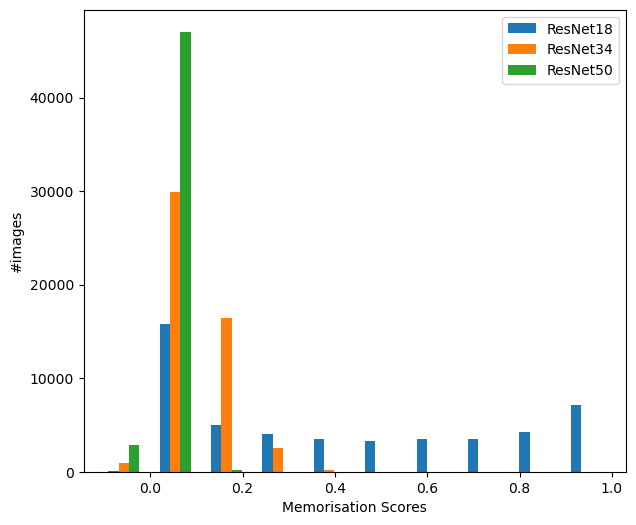

In [24]:
import numpy as np
import matplotlib.pyplot as plt

memorisation_scores_cifar100_resnet18 = np.load('memorsation_scores_cifar100_whole.npy')
memorisation_scores_cifar100_resnet34 = np.load('memorsiation_scores_cifar100_resnet34.npy')
memorisation_scores_cifar100_resnet50 = np.load('memorsiation_scores_cifar100_resnet50.npy')

plt.style.use('seaborn-v0_8-deep')


mem_scores = [memorisation_scores_cifar100_resnet18, memorisation_scores_cifar100_resnet34, memorisation_scores_cifar100_resnet50]
color_range = plt.cm.tab10.colors
colors = color_range[:3]
bar_width = 0.7
fig, ax1 = plt.subplots(1, 1)
fig.set_figwidth(7)
fig.set_figheight(6)
ax1.hist(mem_scores,
            color=colors,
            label=['ResNet18', 'ResNet34', 'ResNet50'],
            align='mid',
            rwidth=0.6
            )
ax1.legend(loc='upper right')
# all_data = np.concatenate([memorisation_scores_subset20, memorisation_scores_subset50, memorisation_scores_whole])
ax1.set_xlabel('Memorisation Scores')
ax1.set_ylabel('#images')

plt.show()

## ResNet width

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Subset
from sklearn.model_selection import StratifiedKFold, train_test_split

memorisation_scores_width_025 = np.load('memorsiation_scores_cifar100_width_025.npy')
memorisation_scores_width_05 = np.load('memorsiation_scores_cifar100_width_05.npy')
memorisation_scores_width_075 = np.load('memorsiation_scores_cifar100_width_075.npy')
memorisation_scores_width_1 = np.load('datasets/memorsation_scores_cifar100.npy')

print('original sizes:')
print(len(memorisation_scores_width_025))
print(len(memorisation_scores_width_05))
print(len(memorisation_scores_width_075))
print(len(memorisation_scores_width_1))

original sizes:
50000
50000
50000
50000


[0.2903207, 0.3995757, 0.4065878, 0.4066202]
[0.56294, 0.58158, 0.56732, 0.56116]
[0.06954, 0.33232, 0.33892, 0.33834]


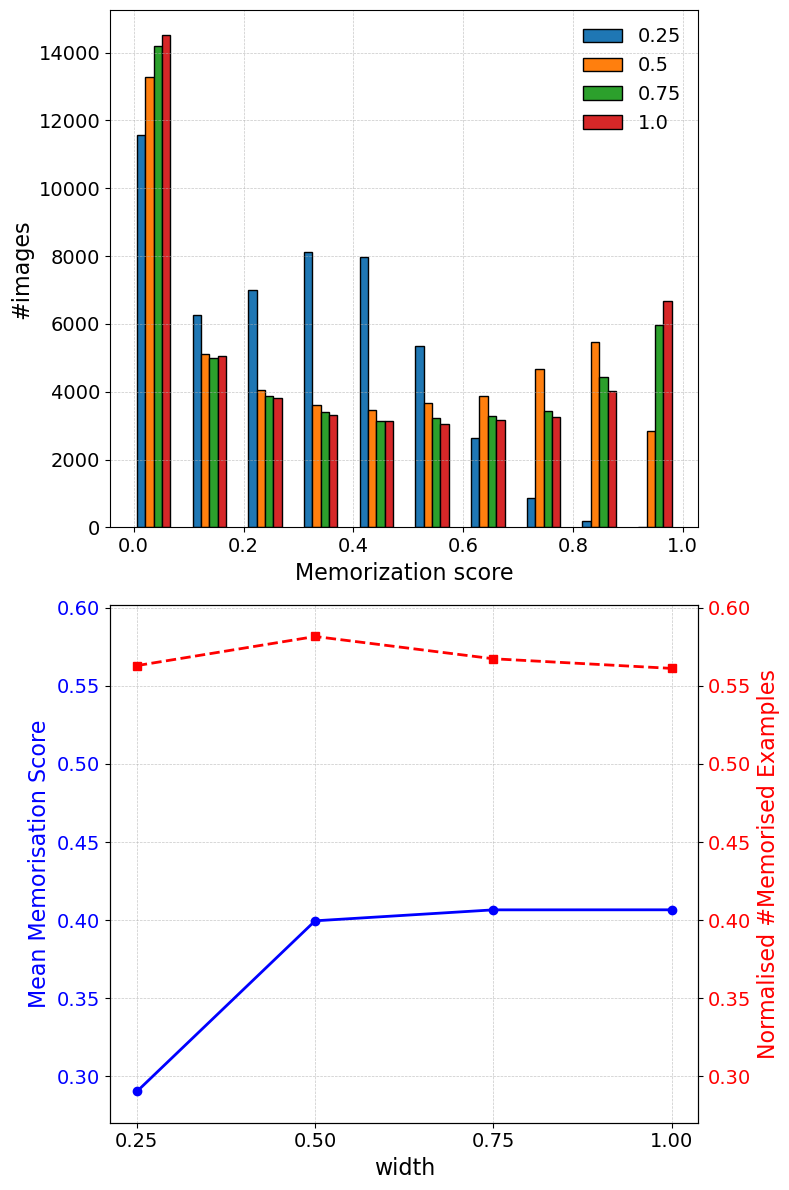

In [27]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-deep')


mem_scores = [memorisation_scores_width_025, memorisation_scores_width_05, memorisation_scores_width_075, memorisation_scores_width_1]
color_range = plt.cm.tab10.colors
colors = color_range[:4]
bar_width = 0.7
fig, ax1 = plt.subplots(2, 1)
fig.set_figwidth(8)
fig.set_figheight(12)
ax1[0].hist(mem_scores,
            color=colors,
            label=['0.25', '0.5', '0.75', '1.0'],
            align='mid',
            rwidth=0.6,
            edgecolor='black'
            )
ax1[0].legend(loc='upper right')
# all_data = np.concatenate([memorisation_scores_subset20, memorisation_scores_subset50, memorisation_scores_whole])
ax1[0].set_xlabel('Memorisation Scores')
ax1[0].set_ylabel('#images')

ax1[0].set_xlabel('Memorization score', fontsize=16)
ax1[0].set_ylabel('#images', fontsize=16)
ax1[0].tick_params(axis='x', labelsize=14)
ax1[0].tick_params(axis='y', labelsize=14)
ax1[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax1[0].legend(loc='upper right', frameon=False, fontsize=14)


subset_sizes = [0.25, 0.5, 0.75, 1.0]
memscore_means = [np.mean(m) for m in mem_scores]
print(memscore_means)
num_above_25 = [np.sum(np.array(m) > 0.25) / len(m) for m in mem_scores]
print(num_above_25)
num_above_60 = [np.sum(np.array(m) > 0.6) / len(m) for m in mem_scores]
print(num_above_60)

# Align the y-limits across both axes
ymin = min(min(memscore_means), min(num_above_25)) - 0.02
ymax = max(max(memscore_means), max(num_above_25)) + 0.02
ax1[1].set_ylim(ymin, ymax)

ax1[1].plot(subset_sizes, memscore_means, marker='o', linestyle='-', color='b', label='Mean Memorisation Scores', linewidth=2)
ax1[1].set_xlabel('width')
ax1[1].set_xticks([0.25, 0.5, 0.75, 1.0])
ax1[1].set_ylabel('Mean Memorisation Score', color='b')
ax1[1].tick_params(axis='y', labelcolor='b')
ax2 = ax1[1].twinx()
ax2.plot(subset_sizes, num_above_25, marker='s', linestyle='--', color='r', label='Normalised #Memorised Examples', linewidth=2)
# ax2.plot(subset_sizes, num_above_50, marker='s', linestyle='--', color='g', label='Normalised #Memorised Examples')
ax2.set_ylabel('Normalised #Memorised Examples', color='r')
ax2.set_ylim(0.50, 0.60)
ax2.tick_params(axis='y', labelcolor='r')

ax1[1].set_xlabel('width', fontsize=16)
ax1[1].set_ylabel('Mean Memorisation Score', color='b', fontsize=16)
ax1[1].tick_params(axis='x', labelsize=14)
ax1[1].tick_params(axis='y', labelcolor='b', labelsize=14)
ax1[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax2.set_ylabel('Normalised #Memorised Examples', color='red', fontsize=16)
ax2.tick_params(axis='y', labelcolor='r', labelsize=14)
ax2.set_ylim(ymin, ymax)

fig.tight_layout()

plt.show()

## Tiny ImageNet

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Subset
from sklearn.model_selection import StratifiedKFold, train_test_split
import sys
sys.path.append('/home/jkozal/Documents/PWr/memorization-cl/memorization-cl/')
from datasets.seq_tinyimagenet import TrainTinyImagenet
from utils.conf import base_path_dataset as base_path

memorisation_scores_classes_20 = np.load('memorsiation_scores_tinyimagenet_classes_0_20.npy')
memorisation_scores_classes_50 = np.load('memorsiation_scores_tinyimagenet_classes_0_50.npy')
memorisation_scores_classes_100 = np.load('memorsiation_scores_tinyimagenet_classes_0_100.npy')
memorisation_scores_classes_200 = np.load('memorsiation_scores_tinyimagenet_classes_0_200.npy')

trainset = TrainTinyImagenet(base_path() + 'TINYIMG', train=True, download=True, transform=None, not_aug_transform=lambda x: x)
print('whole train set size = ', len(trainset))
memorisation_scores_classes_200 = [score for score, (_, label, _, _) in zip(memorisation_scores_classes_200, trainset) if 0 <= label < 20]

trainset = TrainTinyImagenet(base_path() + 'TINYIMG', train=True, download=True, transform=None, not_aug_transform=lambda x: x)
labels = np.array(trainset.targets)
mask = np.logical_and(labels >= 0, labels < 100)
indicies = np.argwhere(mask).flatten()
trainset = Subset(trainset, indicies)
memorisation_scores_classes_100 = [score for score, (_, label, _, _) in zip(memorisation_scores_classes_100, trainset) if 0 <= label < 20]

trainset = TrainTinyImagenet(base_path() + 'TINYIMG', train=True, download=True, transform=None, not_aug_transform=lambda x: x)
labels = np.array(trainset.targets)
mask = np.logical_and(labels >= 0, labels < 50)
indicies = np.argwhere(mask).flatten()
trainset = Subset(trainset, indicies)
memorisation_scores_classes_50 = [score for score, (_, label, _, _) in zip(memorisation_scores_classes_50, trainset) if 0 <= label < 20]

trainset = TrainTinyImagenet(base_path() + 'TINYIMG', train=True, download=True, transform=None, not_aug_transform=lambda x: x)
labels = np.array(trainset.targets)
mask = np.logical_and(labels >= 0, labels < 20)
indicies = np.argwhere(mask).flatten()
trainset = Subset(trainset, indicies)
memorisation_scores_classes_20 = [score for score, (_, label, _, _) in zip(memorisation_scores_classes_20, trainset) if 0 <= label < 20]

print('original sizes:')
print(len(memorisation_scores_classes_20))
print(len(memorisation_scores_classes_50))
print(len(memorisation_scores_classes_100))
print(len(memorisation_scores_classes_200))

Download not needed, files already on disk.
whole train set size =  100000
Download not needed, files already on disk.
Download not needed, files already on disk.
Download not needed, files already on disk.
original sizes:
10000
10000
10000
10000


[0.33531958, 0.41434756, 0.44216856, 0.47939748]
[0.4847, 0.5633, 0.5877, 0.6295]
[0.2626, 0.3504, 0.3881, 0.4256]


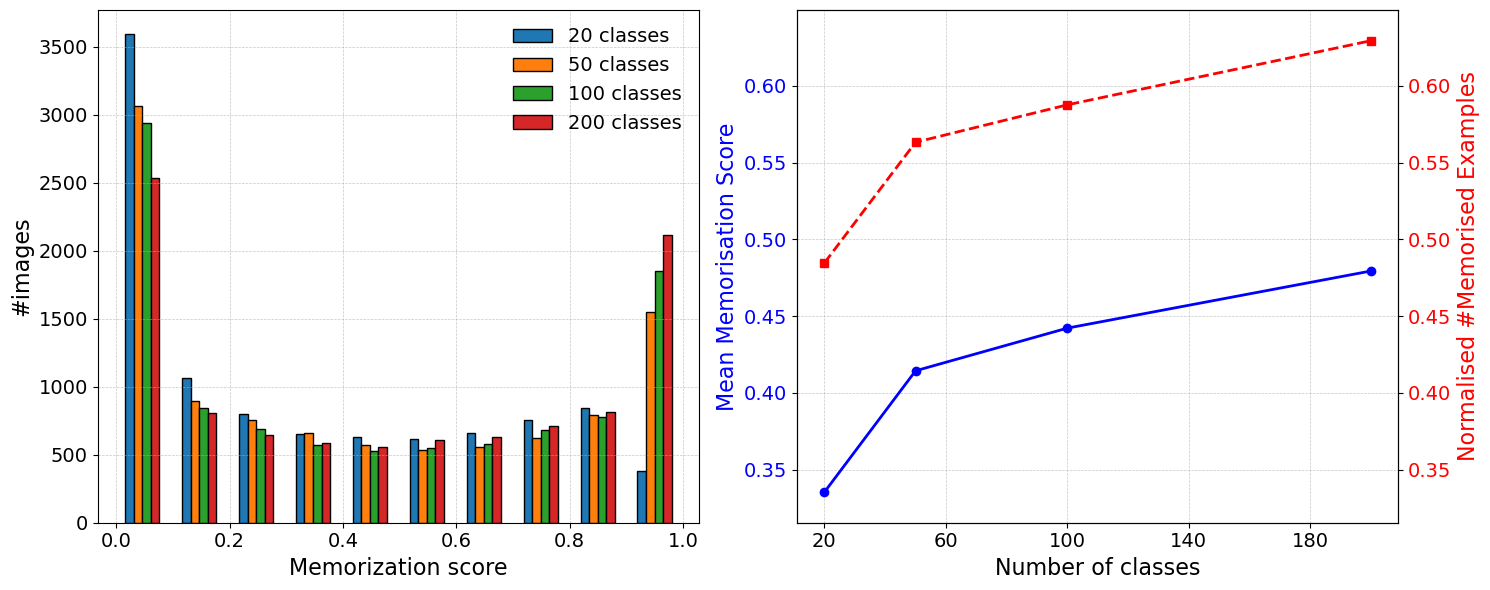

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-deep')


mem_scores = [memorisation_scores_classes_20, memorisation_scores_classes_50, memorisation_scores_classes_100, memorisation_scores_classes_200]
color_range = plt.cm.tab10.colors
colors = color_range[:4]
bar_width = 0.7
fig, ax1 = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.set_figheight(6)
ax1[0].hist(mem_scores,
            color=colors,
            label=['20 classes', '50 classes', '100 classes', '200 classes'],
            align='mid',
            rwidth=0.6,
            edgecolor='black'
            )
ax1[0].legend(loc='upper right')
# all_data = np.concatenate([memorisation_scores_subset20, memorisation_scores_subset50, memorisation_scores_whole])
ax1[0].set_xlabel('Memorisation Scores')
ax1[0].set_ylabel('#images')

ax1[0].set_xlabel('Memorization score', fontsize=16)
ax1[0].set_ylabel('#images', fontsize=16)
ax1[0].tick_params(axis='x', labelsize=14)
ax1[0].tick_params(axis='y', labelsize=14)
ax1[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax1[0].legend(loc='upper right', frameon=False, fontsize=14)


subset_sizes = [20, 50, 100, 200]
memscore_means = [np.mean(m) for m in mem_scores]
print(memscore_means)
num_above_25 = [np.sum(np.array(m) > 0.25) / len(m) for m in mem_scores]
print(num_above_25)
num_above_60 = [np.sum(np.array(m) > 0.6) / len(m) for m in mem_scores]
print(num_above_60)

# Align the y-limits across both axes
ymin = min(min(memscore_means), min(num_above_25)) - 0.02
ymax = max(max(memscore_means), max(num_above_25)) + 0.02
ax1[1].set_ylim(ymin, ymax)

ax1[1].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax1[1].plot(subset_sizes, memscore_means, marker='o', linestyle='-', color='b', label='Mean Memorisation Scores', linewidth=2)
ax1[1].set_xlabel('number of classes')
ax1[1].set_xticks([20, 60, 100, 140, 180])
ax1[1].set_ylabel('Mean Memorisation Score', color='b')
ax1[1].tick_params(axis='y', labelcolor='b')
ax2 = ax1[1].twinx()
ax2.plot(subset_sizes, num_above_25, marker='s', linestyle='--', color='r', label='Normalised #Memorised Examples', linewidth=2)
# ax2.plot(subset_sizes, num_above_50, marker='s', linestyle='--', color='g', label='Normalised #Memorised Examples')
ax2.set_ylabel('Normalised #Memorised Examples', color='r')
# ax2.set_ylim(0.50, 0.60)
ax2.tick_params(axis='y', labelcolor='r')

ax1[1].set_xlabel('Number of classes', fontsize=16)
ax1[1].set_ylabel('Mean Memorisation Score', color='b', fontsize=16)
ax1[1].tick_params(axis='x', labelsize=14)
ax1[1].tick_params(axis='y', labelcolor='b', labelsize=14)

ax2.set_ylabel('Normalised #Memorised Examples', color='red', fontsize=16)
ax2.tick_params(axis='y', labelcolor='r', labelsize=14)
ax2.set_ylim(ymin, ymax)
# ax2.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

fig.tight_layout()

plt.show()

# CIFAR100 Subsets

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Subset

memorisation_scores_cifar100_subset01 = np.load('memorsation_scores_cifar100_01.npy')
memorisation_scores_cifar100_subset02 = np.load('memorsation_scores_cifar100_02.npy')
memorisation_scores_cifar100_subset05 = np.load('memorsation_scores_cifar100_05.npy')
memorisation_scores_whole = np.load('memorsation_scores_cifar100_whole.npy')

print('original sizes:')
print(len(memorisation_scores_cifar100_subset01))
print(len(memorisation_scores_cifar100_subset02))
print(len(memorisation_scores_cifar100_subset05))
print(len(memorisation_scores_whole))

original sizes:
5000
10000
25000
50000


[0.4663909, 0.67784107, 0.54142964, 0.4066202]
[0.8828, 0.8979, 0.72372, 0.56116]


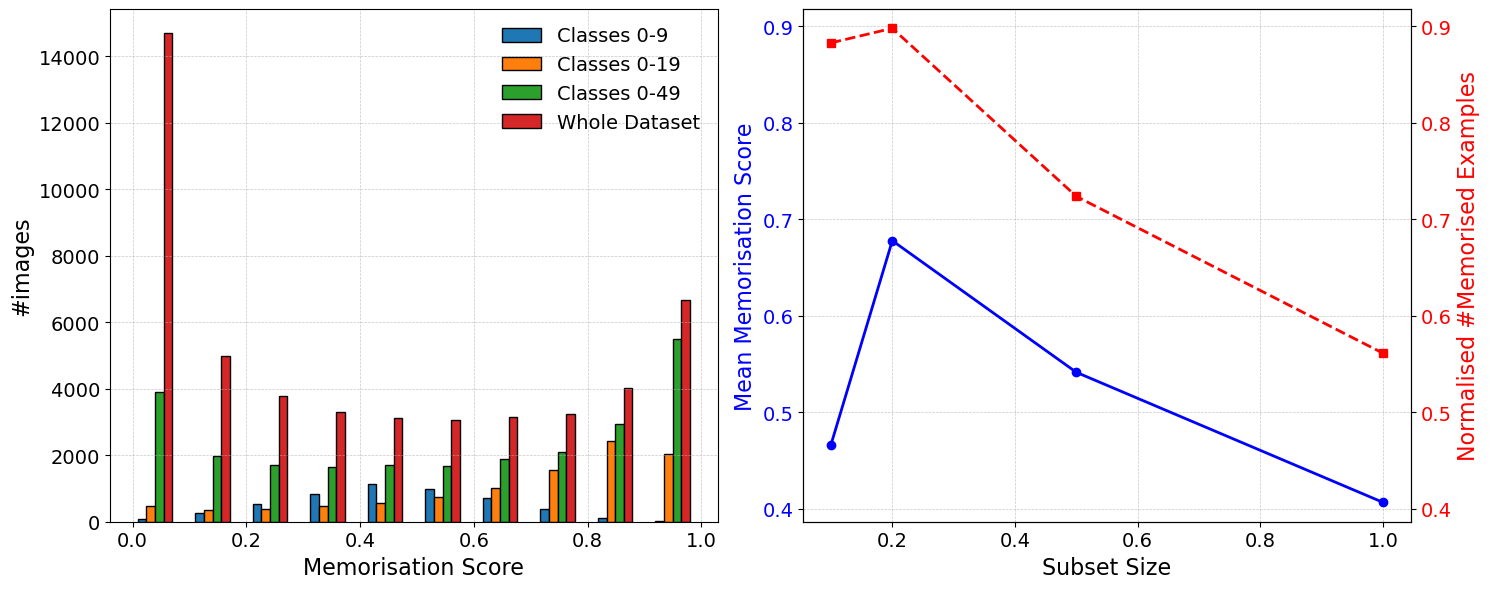

In [45]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-deep')


mem_scores = [memorisation_scores_cifar100_subset01, memorisation_scores_cifar100_subset02, memorisation_scores_cifar100_subset05, memorisation_scores_whole]
color_range = plt.cm.tab10.colors
colors = color_range[:4]
bar_width = 0.7
fig, ax1 = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.set_figheight(6)

bins = np.linspace(0.05, 0.95, 10)  # center positions for 10 bins
width = 0.025  # width of each bar

ax1[0].hist(mem_scores,
            color=colors,
            label=['Classes 0-9', 'Classes 0-19', 'Classes 0-49', 'Whole Dataset'],
            align='mid',
            rwidth=0.6,
            edgecolor='black'
            )
ax1[0].legend(loc='upper right', frameon=False, fontsize=14)
ax1[0].set_xlabel('Memorisation Score', fontsize=16)
ax1[0].set_ylabel('#images', fontsize=16)
ax1[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax1[0].tick_params(axis='x', labelsize=14)
ax1[0].tick_params(axis='y', labelsize=14)

subset_sizes = [0.1, 0.2, 0.5, 1.0]
memscore_means = [np.mean(m) for m in mem_scores]
print(memscore_means)
num_above_25 = [np.sum(np.array(m) > 0.25) / len(m) for m in mem_scores]
print(num_above_25)
num_above_50 = [np.sum(np.array(m) > 0.5) / len(m) for m in mem_scores]

# Align the y-limits across both axes
ymin = min(min(memscore_means), min(num_above_25)) - 0.02
ymax = max(max(memscore_means), max(num_above_25)) + 0.02
ax1[1].set_ylim(ymin, ymax)


ax1[1].plot(subset_sizes, memscore_means, marker='o', linestyle='-', color='b', label='Mean Memorisation Scores', linewidth=2)
ax1[1].set_xlabel('Subset Size', fontsize=16)
# ax1[1].set_xticks([10, 20, 50, 100])
ax1[1].tick_params(axis='x', labelsize=14)
ax1[1].set_ylabel('Mean Memorisation Score', fontsize=16, color='b')
ax1[1].tick_params(axis='y', labelcolor='b', labelsize=14)
ax2 = ax1[1].twinx()
ax1[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax2.plot(subset_sizes, num_above_25, marker='s', linestyle='--', color='r', label='Normalised #Memorised Examples', linewidth=2)
# ax2.plot(subset_sizes, num_above_50, marker='s', linestyle='--', color='g', label='Normalised #Memorised Examples')
ax2.set_ylabel('Normalised #Memorised Examples', fontsize=16, color='r')
ax2.tick_params(axis='y', labelcolor='r', labelsize=14)
ax2.set_ylim(ymin, ymax)

fig.tight_layout()

plt.show()

/tmp/ipykernel_30945/3390519019.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', frameon=False, fontsize=14)


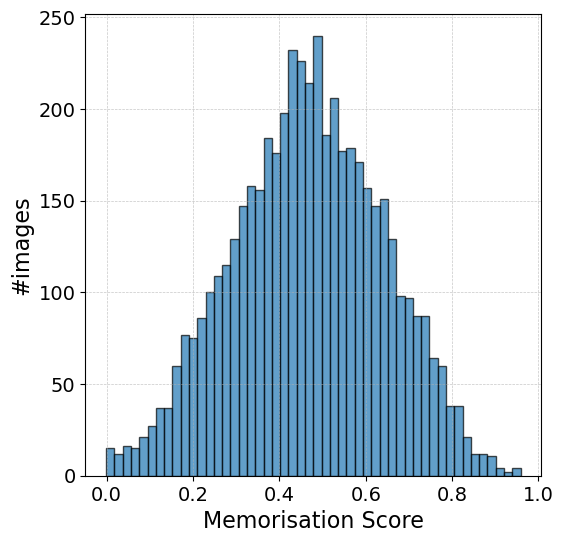

In [44]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(memorisation_scores_cifar100_subset01, bins=50, color=color_range[0], alpha=0.7, edgecolor='black')

# Add labels and legend
plt.xlabel('Memorisation Score', fontsize=16)
plt.ylabel('#images', fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
# plt.title('Subset size 0.1', fontsize=16)
plt.legend(loc='upper right', frameon=False, fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

# Combined plots

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Subset

memorisation_scores_subset10 = np.load('memorsation_scores_subset_0_10.npy')
memorisation_scores_subset20 = np.load('memorsation_scores_subset_0_20.npy')
memorisation_scores_subset50 = np.load('memorsation_scores_subset_0_50.npy')
memorisation_scores_whole = np.load('memorsation_scores_cifar100_whole.npy')

print('original sizes:')
print(len(memorisation_scores_subset10))
print(len(memorisation_scores_subset20))
print(len(memorisation_scores_subset50))
print(len(memorisation_scores_whole))

trainset = torchvision.datasets.CIFAR100(root='/tmp', train=True, download=True, transform=None)
memorisation_scores_whole = [score for score, (_, label) in zip(memorisation_scores_whole, trainset) if 0 <= label < 10]

trainset = torchvision.datasets.CIFAR100(root='/tmp', train=True, download=True, transform=None)
labels = np.array(trainset.targets)
mask = np.logical_and(labels >= 0, labels < 20)
indicies = np.argwhere(mask).flatten()
trainset = Subset(trainset, indicies)
memorisation_scores_subset20 = [score for score, (_, label) in zip(memorisation_scores_subset20, trainset) if 0 <= label < 10]

trainset = torchvision.datasets.CIFAR100(root='/tmp', train=True, download=True, transform=None)
labels = np.array(trainset.targets)
mask = np.logical_and(labels >= 0, labels < 50)
indicies = np.argwhere(mask).flatten()
trainset = Subset(trainset, indicies)
memorisation_scores_subset50 = [score for score, (_, label) in zip(memorisation_scores_subset50, trainset) if 0 <= label < 10]

print('shapes after class filtering:')
print(memorisation_scores_subset10.shape)
print(len(memorisation_scores_subset20))
print(len(memorisation_scores_subset50))
print(len(memorisation_scores_whole))

original sizes:
5000
10000
25000
50000
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
shapes after class filtering:
(5000,)
5000
5000
5000


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Subset
from sklearn.model_selection import StratifiedKFold, train_test_split

memorisation_scores_cifar10_01 = np.load('memorsation_scores_cifar10_01.npy')
memorisation_scores_cifar10_03 = np.load('memorsation_scores_cifar10_03.npy')
memorisation_scores_cifar10_05 = np.load('memorsation_scores_cifar10_05.npy')
memorisation_scores_cifar10_07 = np.load('memorsation_scores_cifar10_07.npy')
memorisation_scores_cifar10_09 = np.load('memorsation_scores_cifar10_09.npy')

print('original sizes:')
print(len(memorisation_scores_cifar10_01))
print(len(memorisation_scores_cifar10_03))
print(len(memorisation_scores_cifar10_05))
print(len(memorisation_scores_cifar10_07))
print(len(memorisation_scores_cifar10_09))

original sizes:
5000
15000
25000
35000
45000


In [36]:
memorisation_scores_cifar100_resnet18 = np.load('memorsation_scores_cifar100_whole.npy')
memorisation_scores_cifar100_resnet34 = np.load('memorsiation_scores_cifar100_resnet34.npy')
memorisation_scores_cifar100_resnet50 = np.load('memorsiation_scores_cifar100_resnet50.npy')

/tmp/ipykernel_30945/27659910.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


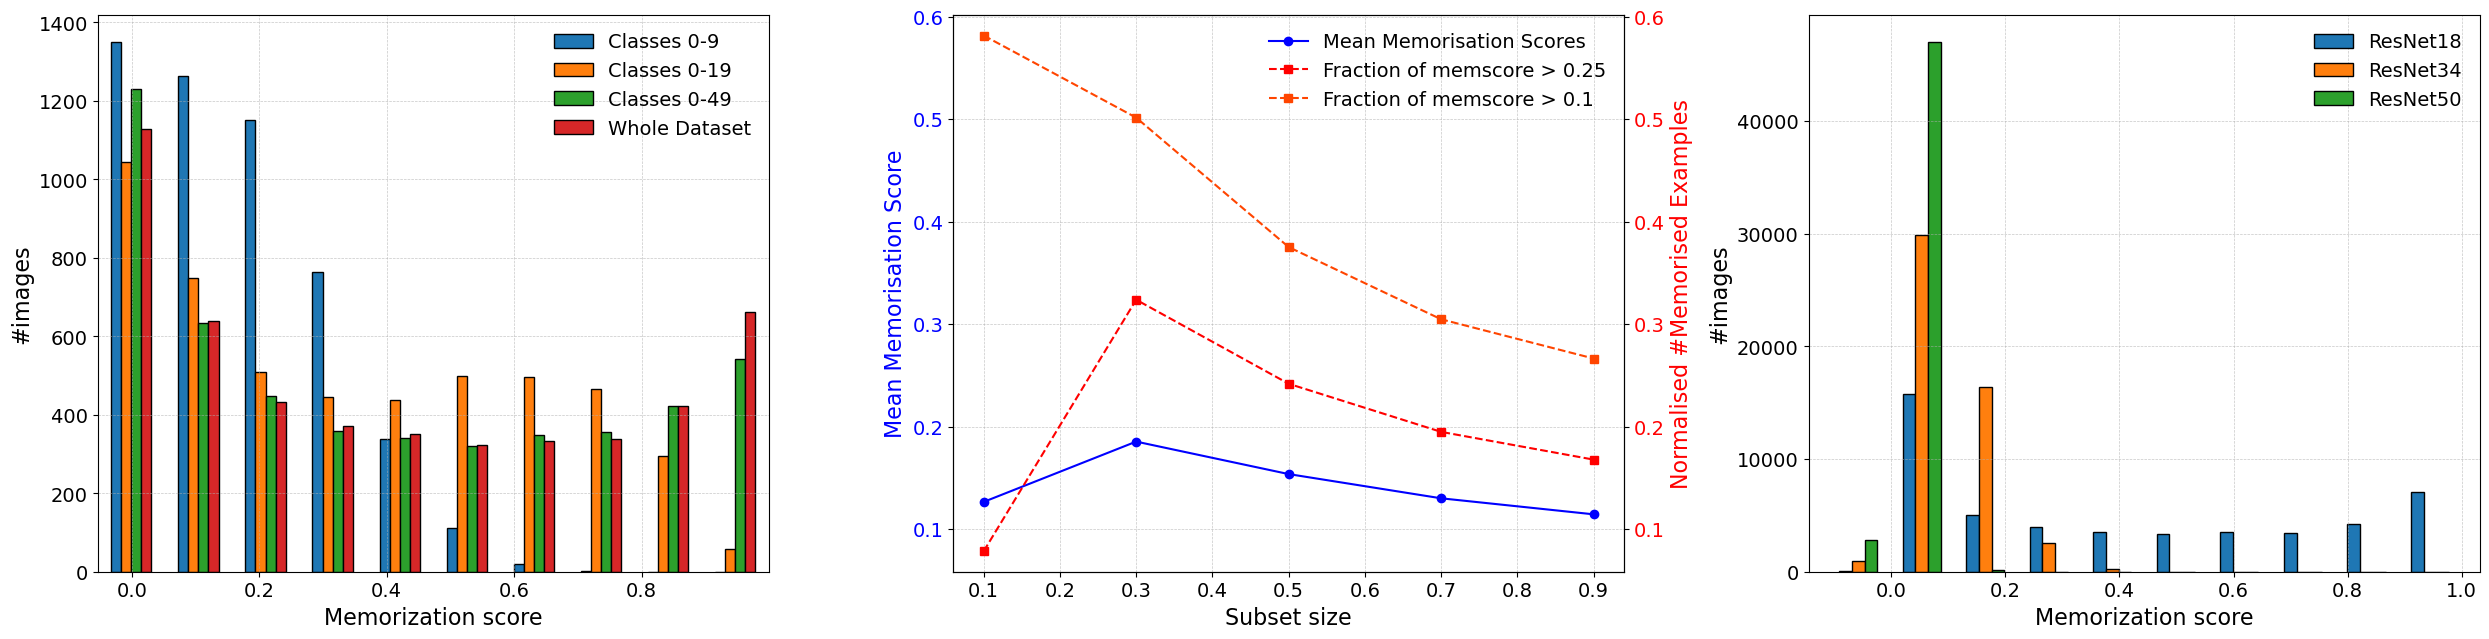

In [34]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-deep')

fig, ax1 = plt.subplots(1, 3)
fig.set_figwidth(25)
fig.set_figheight(6.5)

plt.style.use('seaborn-v0_8-deep')

color_range = plt.cm.tab10.colors
colors = color_range[:4]
bar_width = 0.7
ax1[0].hist([memorisation_scores_subset10, memorisation_scores_subset20, memorisation_scores_subset50, memorisation_scores_whole],
            color=colors,
            label=['Classes 0-9', 'Classes 0-19', 'Classes 0-49', 'Whole Dataset'],
            align='mid',
            rwidth=0.6,
            edgecolor='black'
            )
plt.legend(loc='upper right')
all_data = np.concatenate([memorisation_scores_subset10, memorisation_scores_subset20, memorisation_scores_subset50, memorisation_scores_whole])
ax1[0].set_xlim(np.min(all_data), np.max(all_data))
ax1[0].set_xlabel('Memorisation Scores')
ax1[0].set_ylabel('#images')

ax1[0].set_xlabel('Memorization score', fontsize=16)
ax1[0].set_ylabel('#images', fontsize=16)
ax1[0].tick_params(axis='x', labelsize=14)
ax1[0].tick_params(axis='y', labelsize=14)
ax1[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax1[0].legend(loc='upper right', frameon=False, fontsize=14)

subset_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
mem_scores = [memorisation_scores_cifar10_01, memorisation_scores_cifar10_03, memorisation_scores_cifar10_05, memorisation_scores_cifar10_07, memorisation_scores_cifar10_09]
memscore_means = [np.mean(m) for m in mem_scores]
# print(memscore_means)
num_above_25 = [np.sum(m > 0.25) / len(m) for m in mem_scores]
# print(num_above_25)
num_above_10 = [np.sum(m > 0.1) / len(m) for m in mem_scores]
# print(num_above_10)

# Align the y-limits across both axes
ymin = min(min(memscore_means), min(num_above_25), min(num_above_10)) - 0.02
ymax = max(max(memscore_means), max(num_above_25), max(num_above_10)) + 0.02
ax1[1].set_ylim(ymin, ymax)

lns1 = ax1[1].plot(subset_sizes, memscore_means, marker='o', linestyle='-', color='b', label='Mean Memorisation Scores')
ax1[1].set_xlabel('Subset size')
ax1[1].set_ylabel('Mean Memorisation Score', color='b')
ax1[1].tick_params(axis='y', labelcolor='b')
ax1[1].legend(loc=0)
ax2 = ax1[1].twinx()
lns2 = ax2.plot(subset_sizes, num_above_25, marker='s', linestyle='--', color='r', label='Fraction of memscore > 0.25')
lns3 = ax2.plot(subset_sizes, num_above_10, marker='s', linestyle='--', color='orangered', label='Fraction of memscore > 0.1')
ax2.set_ylabel('Normalised #Memorised Examples', color='r')
ax2.tick_params(axis='y', labelcolor='r')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1[1].legend(lns, labs, loc=0, frameon=False, fontsize=14)

ax1[1].set_xlabel('Subset size', fontsize=16)
ax1[1].set_ylabel('Mean Memorisation Score', color='b', fontsize=16)
ax1[1].tick_params(axis='x', labelsize=14)
ax1[1].tick_params(axis='y', labelcolor='b', labelsize=14)
ax1[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax2.set_ylabel('Normalised #Memorised Examples', color='red', fontsize=16)
ax2.tick_params(axis='y', labelcolor='r', labelsize=14)
ax2.set_ylim(ymin, ymax)


mem_scores = [memorisation_scores_cifar100_resnet18, memorisation_scores_cifar100_resnet34, memorisation_scores_cifar100_resnet50]
color_range = plt.cm.tab10.colors
colors = color_range[:3]
bar_width = 0.7
# fig, ax1 = plt.subplots(1, 1)
# fig.set_figwidth(7)
# fig.set_figheight(6)
ax1[2].hist(mem_scores,
            color=colors,
            label=['ResNet18', 'ResNet34', 'ResNet50'],
            align='mid',
            rwidth=0.6,
            edgecolor='black'
            )
ax1[2].legend(loc='upper right')
# all_data = np.concatenate([memorisation_scores_subset20, memorisation_scores_subset50, memorisation_scores_whole])
ax1[2].set_xlabel('Memorisation Scores')
ax1[2].set_ylabel('#images')

ax1[2].set_xlabel('Memorization score', fontsize=16)
ax1[2].set_ylabel('#images', fontsize=16)
ax1[2].tick_params(axis='x', labelsize=14)
ax1[2].tick_params(axis='y', labelsize=14)
ax1[2].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax1[2].legend(loc='upper right', frameon=False, fontsize=14)


plt.tight_layout()
plt.show()

/tmp/ipykernel_30945/1169005298.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


[0.16749531, 0.3471753, 0.38855916, 0.4094077]
[0.2708, 0.5506, 0.5442, 0.5702]


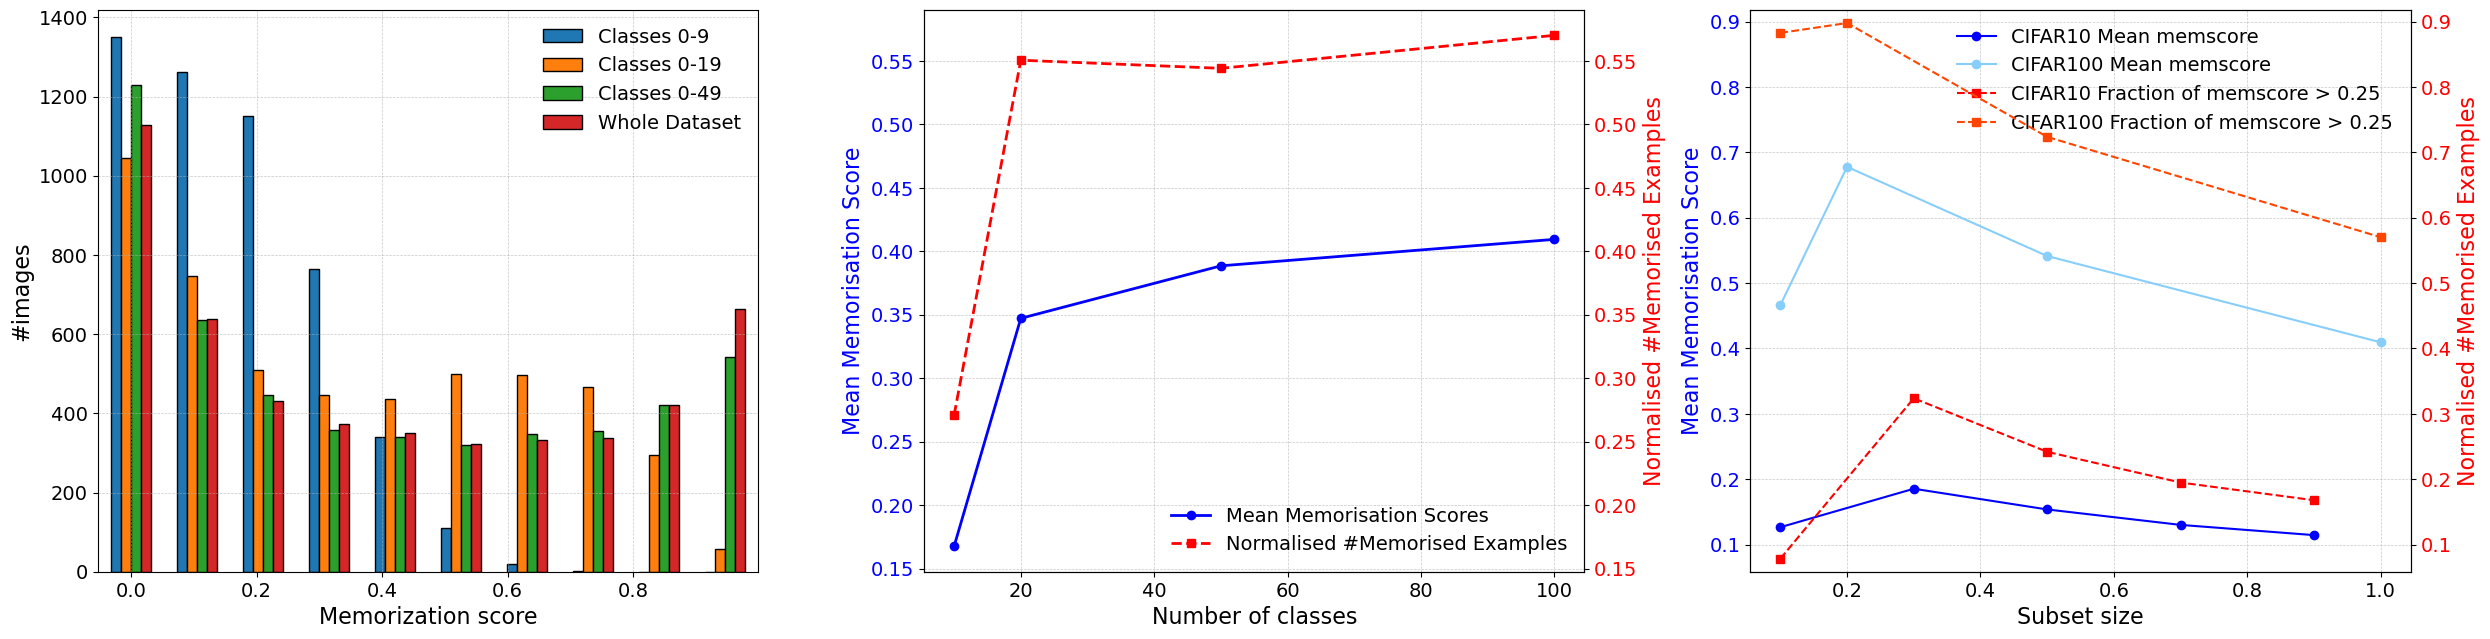

In [80]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-deep')

fig, ax1 = plt.subplots(1, 3)
fig.set_figwidth(25)
fig.set_figheight(6.5)

plt.style.use('seaborn-v0_8-deep')

color_range = plt.cm.tab10.colors
colors = color_range[:4]
bar_width = 0.7
ax1[0].hist([memorisation_scores_subset10, memorisation_scores_subset20, memorisation_scores_subset50, memorisation_scores_whole],
            color=colors,
            label=['Classes 0-9', 'Classes 0-19', 'Classes 0-49', 'Whole Dataset'],
            align='mid',
            rwidth=0.6,
            edgecolor='black'
            )
plt.legend(loc='upper right')
all_data = np.concatenate([memorisation_scores_subset10, memorisation_scores_subset20, memorisation_scores_subset50, memorisation_scores_whole])
ax1[0].set_xlim(np.min(all_data), np.max(all_data))
ax1[0].set_xlabel('Memorisation Scores')
ax1[0].set_ylabel('#images')

ax1[0].set_xlabel('Memorization score', fontsize=16)
ax1[0].set_ylabel('#images', fontsize=16)
ax1[0].tick_params(axis='x', labelsize=14)
ax1[0].tick_params(axis='y', labelsize=14)
ax1[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax1[0].legend(loc='upper right', frameon=False, fontsize=14)


mem_scores = [memorisation_scores_subset10, memorisation_scores_subset20, memorisation_scores_subset50, memorisation_scores_whole]

subset_sizes = [10, 20, 50, 100]
memscore_means = [np.mean(m) for m in mem_scores]
print(memscore_means)
num_above_25 = [np.sum(np.array(m) > 0.25) / len(m) for m in mem_scores]
print(num_above_25)
num_above_50 = [np.sum(np.array(m) > 0.5) / len(m) for m in mem_scores]

# Align the y-limits across both axes
ymin = min(min(memscore_means), min(num_above_25)) - 0.02
ymax = max(max(memscore_means), max(num_above_25)) + 0.02
ax1[1].set_ylim(ymin, ymax)


lns1 = ax1[1].plot(subset_sizes, memscore_means, marker='o', linestyle='-', color='b', label='Mean Memorisation Scores', linewidth=2)
ax1[1].set_xlabel('Number of classes', fontsize=16)
# ax1[1].set_xticks([10, 20, 50, 100])
ax1[1].tick_params(axis='x', labelsize=14)
ax1[1].set_ylabel('Mean Memorisation Score', fontsize=16, color='b')
ax1[1].tick_params(axis='y', labelcolor='b', labelsize=14)
ax2 = ax1[1].twinx()
ax1[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
lns2 = ax2.plot(subset_sizes, num_above_25, marker='s', linestyle='--', color='r', label='Normalised #Memorised Examples', linewidth=2)
# ax2.plot(subset_sizes, num_above_50, marker='s', linestyle='--', color='g', label='Normalised #Memorised Examples')
ax2.set_ylabel('Normalised #Memorised Examples', fontsize=16, color='r')
ax2.tick_params(axis='y', labelcolor='r', labelsize=14)
ax2.set_ylim(ymin, ymax)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1[1].legend(lns, labs, loc='lower right', frameon=False, fontsize=14)


subset_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
mem_scores_cifar10 = [memorisation_scores_cifar10_01, memorisation_scores_cifar10_03, memorisation_scores_cifar10_05, memorisation_scores_cifar10_07, memorisation_scores_cifar10_09]
mem_scores_cifar100 = [memorisation_scores_cifar100_subset01, memorisation_scores_cifar100_subset02, memorisation_scores_cifar100_subset05, np.array(memorisation_scores_whole)]
memscore_means_cifar10 = [np.mean(m) for m in mem_scores_cifar10]
num_above_25_cifar10 = [np.sum(m > 0.25) / len(m) for m in mem_scores_cifar10]

memscore_means_cifar100 = [np.mean(m) for m in mem_scores_cifar100]
num_above_25_cifar100 = [np.sum(m > 0.25) / len(m) for m in mem_scores_cifar100]

# Align the y-limits across both axes
ymin = min(min(memscore_means_cifar10), min(memscore_means_cifar100), min(num_above_25_cifar10), min(num_above_25_cifar100)) - 0.02
ymax = max(max(memscore_means_cifar10), max(memscore_means_cifar100), max(num_above_25_cifar10), max(num_above_25_cifar100)) + 0.02
ax1[2].set_ylim(ymin, ymax)

lns1 = ax1[2].plot(subset_sizes, memscore_means_cifar10, marker='o', linestyle='-', color='b', label='CIFAR10 Mean memscore')
lns2 = ax1[2].plot([0.1, 0.2, 0.5, 1.0], memscore_means_cifar100, marker='o', linestyle='-', color='lightskyblue', label='CIFAR100 Mean memscore')
ax1[2].set_xlabel('Subset size')
ax1[2].set_ylabel('Mean Memorisation Score', color='b')
ax1[2].tick_params(axis='y', labelcolor='b')
ax1[2].legend(loc=0)
ax2 = ax1[2].twinx()
lns3 = ax2.plot(subset_sizes, num_above_25_cifar10, marker='s', linestyle='--', color='r', label='CIFAR10 Fraction of memscore > 0.25')
lns4 = ax2.plot([0.1, 0.2, 0.5, 1.0], num_above_25_cifar100, marker='s', linestyle='--', color='orangered', label='CIFAR100 Fraction of memscore > 0.25')

ax2.set_ylabel('Normalised #Memorised Examples', color='r')
ax2.tick_params(axis='y', labelcolor='r')

lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax1[2].legend(lns, labs, loc=0, frameon=False, fontsize=14)

ax1[2].set_xlabel('Subset size', fontsize=16)
ax1[2].set_ylabel('Mean Memorisation Score', color='b', fontsize=16)
ax1[2].tick_params(axis='x', labelsize=14)
ax1[2].tick_params(axis='y', labelcolor='b', labelsize=14)
ax1[2].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax2.set_ylabel('Normalised #Memorised Examples', color='red', fontsize=16)
ax2.tick_params(axis='y', labelcolor='r', labelsize=14)
ax2.set_ylim(ymin, ymax)


plt.tight_layout()
plt.show()

# Combined plots - architecture

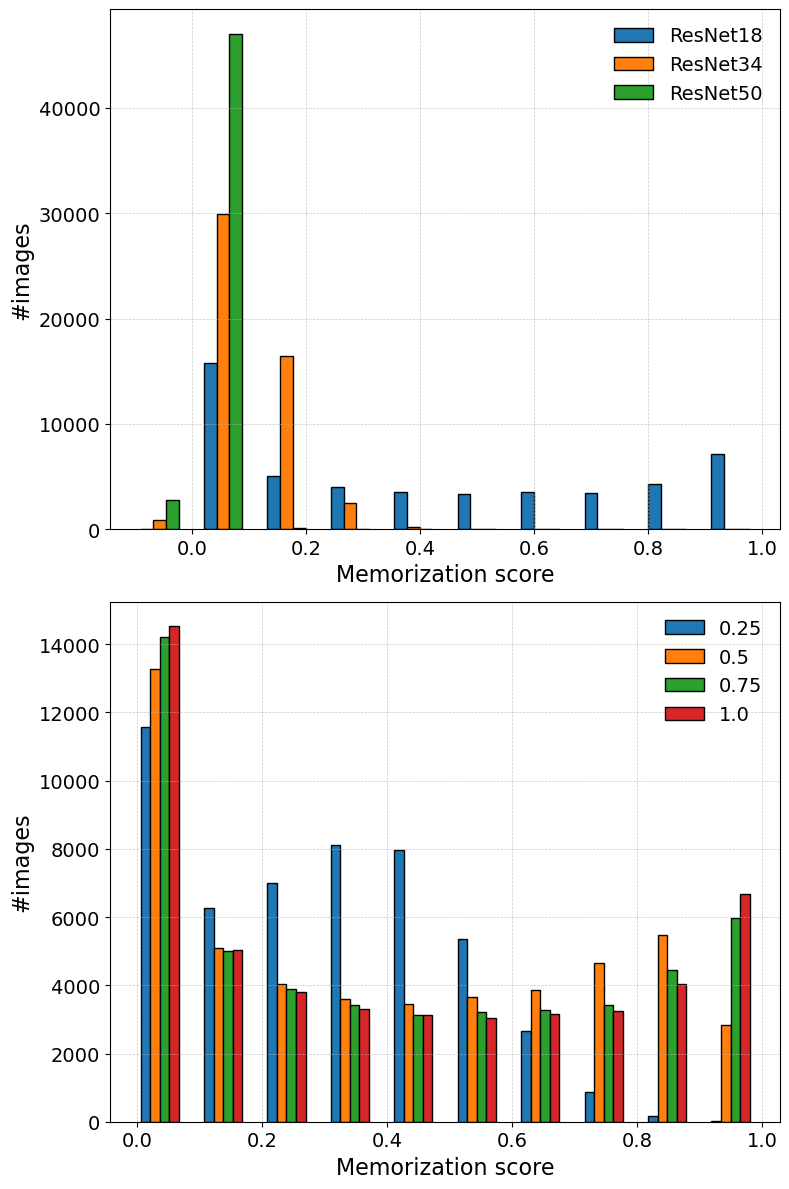

In [74]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-deep')


mem_scores = [memorisation_scores_cifar100_resnet18, memorisation_scores_cifar100_resnet34, memorisation_scores_cifar100_resnet50]
color_range = plt.cm.tab10.colors
colors = color_range[:3]
bar_width = 0.7
fig, ax1 = plt.subplots(2, 1)
# fig, ax1 = plt.subplots(1, 1)
# fig.set_figwidth(7)
# fig.set_figheight(6)
ax1[0].hist(mem_scores,
            color=colors,
            label=['ResNet18', 'ResNet34', 'ResNet50'],
            align='mid',
            rwidth=0.6,
            edgecolor='black'
            )
ax1[0].legend(loc='upper right')
# all_data = np.concatenate([memorisation_scores_subset20, memorisation_scores_subset50, memorisation_scores_whole])
ax1[0].set_xlabel('Memorisation Scores')
ax1[0].set_ylabel('#images')

ax1[0].set_xlabel('Memorization score', fontsize=16)
ax1[0].set_ylabel('#images', fontsize=16)
ax1[0].tick_params(axis='x', labelsize=14)
ax1[0].tick_params(axis='y', labelsize=14)
ax1[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax1[0].legend(loc='upper right', frameon=False, fontsize=14)


mem_scores = [memorisation_scores_width_025, memorisation_scores_width_05, memorisation_scores_width_075, memorisation_scores_width_1]
color_range = plt.cm.tab10.colors
colors = color_range[:4]
bar_width = 0.7

fig.set_figwidth(8)
fig.set_figheight(12)
ax1[1].hist(mem_scores,
            color=colors,
            label=['0.25', '0.5', '0.75', '1.0'],
            align='mid',
            rwidth=0.6,
            edgecolor='black'
            )
ax1[1].legend(loc='upper right')
# all_data = np.concatenate([memorisation_scores_subset20, memorisation_scores_subset50, memorisation_scores_whole])
ax1[1].set_xlabel('Memorisation Scores')
ax1[1].set_ylabel('#images')

ax1[1].set_xlabel('Memorization score', fontsize=16)
ax1[1].set_ylabel('#images', fontsize=16)
ax1[1].tick_params(axis='x', labelsize=14)
ax1[1].tick_params(axis='y', labelsize=14)
ax1[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax1[1].legend(loc='upper right', frameon=False, fontsize=14)

fig.tight_layout()

plt.show()